# Analysis of Sjogrens Syndrome PBMCs

## Data source: GSE157278

### **Single-cell RNA Sequencing reveals the expansion of Cytotoxic CD4+ T lymphocytes and the heterogeneity of pathogenesis in primary Sjögren’s syndrome patients**

#### "By single cell RNA sequencing, our data revealed disease-specific immune cell subsets and provide some potential new targets of pSS, specific expansion of CD4+ CTLs may be involved in the pathogenesis of pSS, which might give a valuable insights for therapeutic interventions of pSS."

#### "We applied single cell RNA sequencing (scRNA-seq) to 57, 288 peripheral blood mononuclear cells (PBMCs) from 5 patients with pSS and 5 healthy controls. The immune cell subsets and susceptibility genes involved in the pathogenesis of pSS were analyzed."

# TODO

- [ ] CellTypist Annotations
- [ ] Simple quick data processing
- [ ] DEA
- [ ] LIANA

Should be quick all of this already implemented in python

In [1]:
PDIR = '/Users/aumchampaneri/VSCode Projects/complement-receptor-blockade/'

# Convert raw data to AnnData

In [2]:
import os
import scanpy as sc

# Path to the folder containing your raw-data files
data_dir = f"{PDIR}/sjogrens-pbmc/raw-data"
print("Files in directory:", os.listdir(data_dir))

# Read 10x Genomics formatted data
adata = sc.read_10x_mtx(
    data_dir,             # Path to directory with matrix.mtx, barcodes.tsv, features.tsv
    var_names='gene_symbols',  # Use gene symbols for variable names
    cache=True,                 # Cache the result for faster future loading
)

Files in directory: ['cell_batch.tsv.gz', 'features.tsv.gz', 'barcodes.tsv.gz', 'matrix.mtx.gz']


## Data exploration

In [3]:
adata

AnnData object with n_obs × n_vars = 61405 × 33694
    var: 'gene_ids', 'feature_types'

In [4]:
adata.obs

""
AAACCTGAGACCTAGG-1
AAACCTGAGCCACCTG-1
AAACCTGAGTCATCCA-1
AAACCTGCAGATGAGC-1
AAACCTGCATCCGCGA-1
...
TTTGTCAGTCTAGTGT-10
TTTGTCAGTCTCTCTG-10
TTTGTCAGTGCACGAA-10
TTTGTCAGTGCAGGTA-10


In [5]:
adata.var

,gene_ids,feature_types
RP11-34P13.3,ENSG00000243485,Gene Expression
FAM138A,ENSG00000237613,Gene Expression
OR4F5,ENSG00000186092,Gene Expression
RP11-34P13.7,ENSG00000238009,Gene Expression
RP11-34P13.8,ENSG00000239945,Gene Expression
...,...,...
AC233755.2,ENSG00000277856,Gene Expression
AC233755.1,ENSG00000275063,Gene Expression
AC240274.1,ENSG00000271254,Gene Expression
AC213203.1,ENSG00000277475,Gene Expression


## Data modification

1. Merge 'cell_batch.tsv' to .obs layer
2. Extrapolate 'disease' and patient_ID
3. Rearange and rename .var columns

In [6]:
import pandas as pd

# Read the cell_batch file, using the first column (barcodes) as the index
cell_batch = pd.read_csv(f"{PDIR}/sjogrens-pbmc/raw-data/cell_batch.tsv.gz", sep='\t', header=0, index_col=0)

# Align and assign the batch/condition info to AnnData obs
adata.obs['cell_batch'] = adata.obs_names.map(cell_batch.iloc[:, 0])

# Preview the result
print(adata.obs[['cell_batch']].head())

                   cell_batch
AAACCTGAGACCTAGG-1       HC-1
AAACCTGAGCCACCTG-1       HC-1
AAACCTGAGTCATCCA-1       HC-1
AAACCTGCAGATGAGC-1       HC-1
AAACCTGCATCCGCGA-1       HC-1


In [7]:
# Extract disease and patient id from the cell_batch column
disease_labels = adata.obs['cell_batch'].str.extract(r'^(pSS|HC)')[0]
patient_ids = adata.obs['cell_batch'].str.extract(r'-(\d+)$')[0]

# Assign disease column
adata.obs['disease'] = disease_labels

# Set HC in disease column to 'normal'
adata.obs.loc[adata.obs['disease'] == 'HC', 'disease'] = 'normal'

# Set pSS in disease column to 'sjogren syndrome'
adata.obs.loc[adata.obs['disease'] == 'pSS', 'disease'] = 'sjogren syndrome'

# Create a mapping from (disease, patient_id) to a unique join_id number (1-10)
unique_patients = adata.obs[['disease', 'cell_batch']].drop_duplicates()
unique_patients['join_id'] = range(1, len(unique_patients) + 1)

# Merge back to obs to assign patient numbers
adata.obs = adata.obs.merge(unique_patients[['cell_batch', 'join_id']], left_on='cell_batch', right_on='cell_batch', how='left')

# Add count data
adata.obs["n_counts"] = adata.X.sum(axis=1)

# Add unassigned batch data
adata.obs["batch"] = "unassigned"

# Preview the new columns
print(adata.obs[['cell_batch', 'disease', 'join_id']].head())

  cell_batch disease  join_id
0       HC-1  normal        1
1       HC-1  normal        1
2       HC-1  normal        1
3       HC-1  normal        1
4       HC-1  normal        1


In [8]:
# Duplicate the .var index to a new column 'feature_names'
adata.var["feature_names"] = adata.var.index

# Rename gene_ids to ensembl_id
adata.var.rename(columns={"gene_ids": "ensembl_id"}, inplace=True)

# Replace the information in the index column with the ensembl_id values
adata.var.index = adata.var["ensembl_id"]

# Clear the index column name
adata.var.index.name = None

## Save processed AnnData object

In [9]:
import os
os.makedirs(f"{PDIR}/sjogrens-pbmc/input-data/", exist_ok=True)

In [10]:
# Save prepared AnnData object for Geneformer tokenization
adata.write_h5ad(f"{PDIR}/sjogrens-pbmc/input-data/sjogrens-pbmc_prepared.h5ad")

## TODO - Tokenization preparations

# Cell type annotation - CellTypist

# Data processing (Quality Control)

1. Regular?
2. Pearson Residuals?
3. DE Analysis
4. 

In [ ]:
adata = sc.read_h5ad(f"{PDIR}/sjogrens-pbmc/input-data/sjogrens-pbmc_prepared.h5ad")

## Use scanpy for processing (zheng17 recipe)

In [ ]:
sc.pp.recipe_zheng17(
    adata,
    n_top_genes=2000,
    log = True,
    plot=True,
    copy=False
)

## Use scanpy pearson residuals (experimental)

In [ ]:
sc.experimental.pp.recipe_pearson_residuals(adata, n_top_genes=2000, log=True, plot=True, copy=False)

## Plot UMAP

In [ ]:
sc.pp.pca(adata, n_comps=50, svd_solver='arpack')
sc.pp.neighbors(adata, n_neighbors=15, n_pcs=50)
sc.tl.umap(adata)
sc.tl.leiden(adata, resolution=0.5)
sc.pl.umap(adata, color=['disease', 'leiden'], wspace=0.4)

# Differential Expression Analysis - pyDeSeq2
Pseudobulk data then DEA

In [ ]:
adata = sc.read_h5ad(f"{PDIR}/sjogrens-pbmc/input-data/sjogrens-pbmc_prepared.h5ad")

## Pseudobulk data

# Receptor-Ligand Analysis - LIANA

# Probabilistic modeling and analysis of single-cell omics data in rare disease

This section demonstrates how to use the scVI model and embeddings to analyze a rare disease dataset, following the workflow from the vcp-tutorial-scvi notebook.

## Environment Setup and Imports

Install and import required packages for scVI, CELLxGENE Census, and single-cell analysis.

In [11]:
# Install required packages (uncomment if running in a new environment)
# !pip install scvi-tools==1.2.0 tiledbsoma==1.14.4 'cellxgene_census[experimental]'==1.16.2 scanpy==1.10.3 jupyterlab jupyter ipywidgets

import os, sys, gc, warnings, pprint, yaml, json, functools
warnings.filterwarnings('ignore')

import cellxgene_census
from cellxgene_census.experimental import get_embedding
import tiledbsoma as soma
import scvi
import scanpy as sc
import anndata as ad
import numpy as np
import pandas as pd
import scipy.sparse as sp
from sklearn.ensemble import RandomForestClassifier
import seaborn as sn
import matplotlib.pylab as plt

CENSUS_VERSION = "2024-07-01"
pp = pprint.PrettyPrinter(indent=4)
%matplotlib inline

## Load AnnData object

In [ ]:
adata = sc.read_h5ad(f"{PDIR}/sjogrens-pbmc/input-data/sjogrens-pbmc_prepared.h5ad")

## Download and Prepare scVI Model

Download the pretrained scVI model and align your data's feature space.

In [14]:
!mkdir -p ../sjogrens-pbmc/scvi-human-2024-07-01
!curl -L -o ../sjogrens-pbmc/scvi-human-2024-07-01/model.pt https://cellxgene-contrib-public.s3.us-west-2.amazonaws.com/models/scvi/2024-07-01/homo_sapiens/model.pt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  409M  100  409M    0     0  6118k      0  0:01:08  0:01:08 --:--:-- 2116k:--     064k      0  0:05:31  0:00:13  0:05:18 2490k71k97k      0  0:03:10  0:00:24  0:02:46 2193k  0  2191k      0  0:03:11  0:00:30  0:02:41 2210k3:10  0:00:32  0:02:38 2354k1:13 11.3M     0  0:01:11  0:00:53  0:00:18 16.5M


In [23]:
# Prepare AnnData for scVI
scvi.model.SCVI.prepare_query_anndata(adata,
                                      "../sjogrens-pbmc/scvi-human-2024-07-01",
                                      return_reference_var_names=True)
adata.var.head()

INFO     File ../sjogrens-pbmc/scvi-human-2024-07-01/model.pt already downloaded                                   


,ensembl_id,feature_types
feature_names,,
TNMD,ENSG00000000005,Gene Expression
CFH,ENSG00000000971,Gene Expression
NFYA,ENSG00000001167,Gene Expression
LAS1L,ENSG00000001497,Gene Expression
CFTR,ENSG00000001626,Gene Expression


## Generate Embeddings and Visualize

Run the model to generate embeddings and visualize using UMAP.

In [29]:
# Set var index to Ensembl IDs for scVI compatibility
adata.var.set_index("ensembl_id", inplace=True)

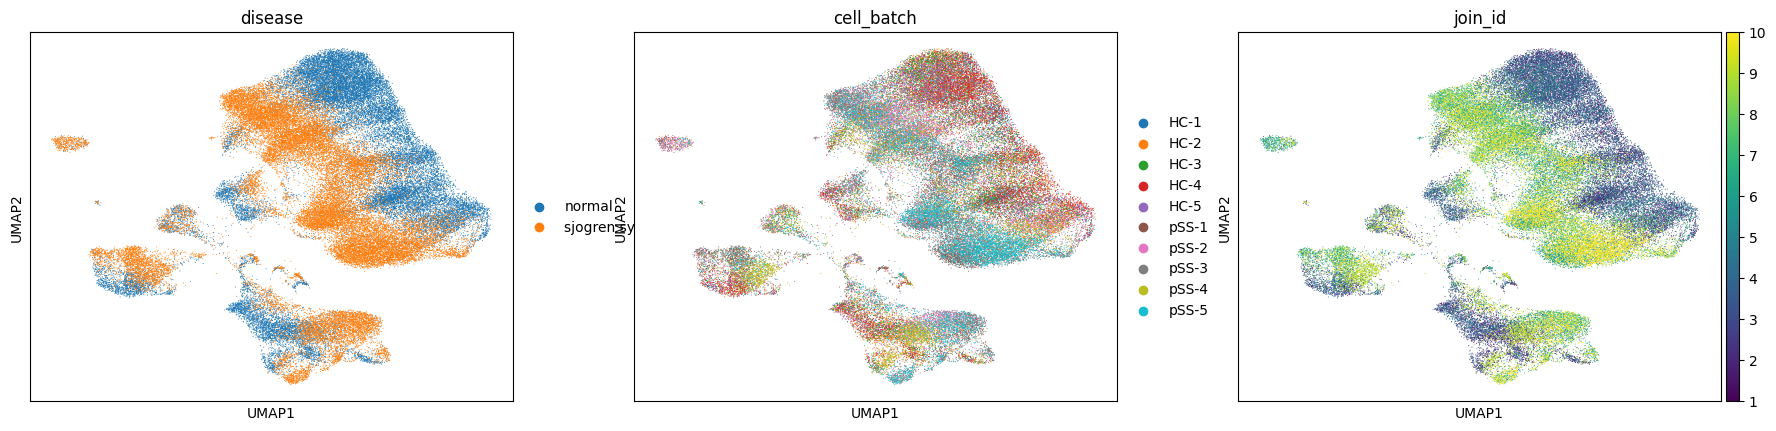

In [33]:
# Align and run model inference
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.pp.neighbors(adata, n_neighbors=20, use_rep="scvi")
umap_scvi = sc.tl.umap(adata, copy=True, n_components=2)
adata.obsm['X_umap_scvi'] = umap_scvi.obsm['X_umap']
sc.pl.umap(umap_scvi, color=["disease", "cell_batch", "join_id"])

## Search for Similar Cells in CELLxGENE Census

Use the scVI embeddings to find similar cells in the CELLxGENE corpus.

In [37]:
# Find similar cells in CELLxGENE Census
neighbors = cellxgene_census.experimental.find_nearest_obs(
    "scvi", "homo_sapiens", CENSUS_VERSION, query=adata, k=30, memory_GiB=24, nprobe=20
)
neighbors

NeighborObs(distances=array([[0.25260422, 0.2946584 , 0.30719462, ..., 0.39541563, 0.39541563,
        0.41035548],
       [0.33678833, 0.33866605, 0.3782953 , ..., 0.5434883 , 0.54616433,
        0.5486358 ],
       [0.3442541 , 0.43825164, 0.4772467 , ..., 0.6125434 , 0.6125434 ,
        0.618431  ],
       ...,
       [0.2407998 , 0.2407998 , 0.35969043, ..., 0.5456781 , 0.5482399 ,
        0.5483332 ],
       [0.26719737, 0.2997785 , 0.35447854, ..., 0.52363074, 0.5339346 ,
        0.5339346 ],
       [0.6532606 , 0.6532606 , 0.6730701 , ..., 0.8735231 , 0.8735231 ,
        0.8834548 ]], dtype=float32), neighbor_ids=array([[46288721, 26793531, 37100328, ..., 12174072,  1677959, 40404889],
       [50772839, 17523810, 21697493, ..., 31412477, 36345425, 13650257],
       [51269980,  4894676, 51416645, ..., 29240751, 10835884, 31051964],
       ...,
       [55165664, 58404077, 31011572, ..., 50957701, 51093735, 55629127],
       [51114551, 40798409, 50562834, ..., 55506609, 12915471, 2

## Retrieve and Visualize Reference Data

Download and visualize metadata and embeddings for the identified similar cells.

In [ ]:
# Download reference AnnData for similar cells
with cellxgene_census.open_soma(census_version=CENSUS_VERSION) as census:
    neighbors_adata = cellxgene_census.get_anndata(
        census,
        "homo_sapiens",
        "RNA",
        obs_coords=sorted(neighbors.neighbor_ids[:, 0].tolist()),
        obs_embeddings=["scvi"],
        X_name="normalized",
        column_names={"obs": ["soma_joinid", "tissue", "tissue_general", "cell_type", "disease", "dataset_id"]},
    )
neighbors_adata.var_names = neighbors_adata.var["feature_id"]

# Visualize UMAP of reference data
sc.pp.neighbors(neighbors_adata, n_neighbors=10, use_rep="scvi")
neighbors_adata = sc.tl.umap(neighbors_adata, copy=True, n_components=2)
neighbors_adata.obs["cell_type"] = neighbors_adata.obs["cell_type"].cat.remove_unused_categories()
neighbors_adata.obs["tissue"] = neighbors_adata.obs["tissue"].cat.remove_unused_categories()
neighbors_adata.obs["tissue"] = neighbors_adata.obs["tissue_general"].cat.remove_unused_categories()
sc.pl.umap(neighbors_adata, color="tissue_general")
print(neighbors_adata.obs['tissue'].value_counts())
print(neighbors_adata.obs['cell_type'].value_counts())
print(neighbors_adata.obs['dataset_id'].value_counts())